# The Wonderful World of Coffee
### Business Understanding
This notebook begins to explore a coffee dataset that has been scraped by a reddit user and uploaded onto GitHub.
Our idea behind researching this dataset is to identify where our favorite coffee brands come from, and what attributes 
go into the production of that coffee that makes it so desirable?  Can a model be built targeting those ranges of successful
coffee producers in order to predict ratings for their future brands?  What coffee types go into a successful brand.  These
are some of the questions we will be delving into for our first project.

The data source for our dataset:

https://github.com/jldbc/coffee-quality-database

### Data Description (Meaning/Type/Quality)
Lets import our libraries and data. 


In [11]:
#Add library references
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
#Upload Data
df_ar = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv',
                    sep=',', header=0) # read in the arabicaica data
df_rob = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv',
                     sep=',', header=0) # read in the Robusta data
#Column rename to match for merging
df_ar.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df_rob.rename(columns={'Unnamed: 0':'Id',
                       'Bitter...Sweet':'Sweetness',
                       'Uniform.Cup':'Uniformity',
                       'Salt...Acid':'Acidity',
                       'Fragrance...Aroma':'Aroma'}, inplace=True)


## Data meaning

Below is a list of continuous and categorical measures:
### Continuous (Quality) Measures
* Aroma
* Flavor
* Aftertaste
* Acidity
* Body
* Balance
* Uniformity
* Cup Cleanliness
* Sweetness
* Moisture
* Defects
* Cupper Points
* Total Cup Points

### Categorical (Bean) Measures
* Processing Method
* Color
* Species (arabica / robusta)

### Categorical (Farm) Measures
* Owner
* Country of Origin
* Farm Name
* Lot Number
* Mill
* Company
* Altitude
* Region

Since the data came to us in two CSV's of arabica and robusta, lets combine the two datasets to begin our analysis.  First we'll need to remove 
a few columns and merge the two dataframes.

In [19]:
#dropping columns we won't use
df_rob = df_rob.drop(['Lot.Number', 'altitude_low_meters', 'altitude_high_meters', 'Certification.Contact',
                      'Certification.Contact', 'Expiration', 'Certification.Body', 'ICO.Number',
                      'Certification.Address','Mouthfeel'], axis=1)
df_ar = df_ar.drop(['Lot.Number', 'altitude_low_meters', 'altitude_high_meters', 'Certification.Contact',
                      'Certification.Contact', 'Expiration', 'Certification.Body', 'ICO.Number',
                      'Certification.Address'], axis=1)

df_comb = df_ar.append(df_rob)


C:\Users\andyh\Anaconda3\envs\miner\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### Data ranges and counts of nulls
Now that our dataframes are combined, lets analyze some simple statistics of first and last rows

In [20]:
#Simple Stats
# print(df_comb.head().append(df_comb.tail()), "\n")
print("Structure of arabica:\n",df_comb.shape,"\n")
print("Summary Statistic's:\n",df_comb.describe(),"\n")
print("Count of missing arabica values:\n",df_comb.isnull().sum().sort_values(ascending=False),"\n")




    Acidity  Aftertaste       Altitude  Aroma Bag.Weight  Balance  Body  \
0      8.75        8.67      1950-2200   8.67      60 kg     8.42  8.50   
1      8.58        8.50      1950-2200   8.75      60 kg     8.42  8.42   
2      8.42        8.42  1600 - 1800 m   8.42          1     8.42  8.33   
3      8.42        8.42      1800-2200   8.17      60 kg     8.25  8.50   
4      8.50        8.25      1950-2200   8.25      60 kg     8.33  8.42   
23     7.58        7.33            NaN   7.75       2 kg     7.83   NaN   
24     7.75        7.75             40   7.50       2 kg     5.25   NaN   
25     7.42        7.17     795 meters   7.33       1 kg     7.17   NaN   
26     7.17        6.75            NaN   7.42      5 lbs     7.00   NaN   
27     6.83        6.50            NaN   6.75      5 lbs     6.83   NaN   

    Category.One.Defects  Category.Two.Defects  Clean.Cup  ...  \
0                      0                     0      10.00  ...   
1                      0                  

In [ ]:
#Changing datatypes
conv_dict = {'Species': str,
                'Owner': str,
                'Mill': str,
                'Company': str,
                'Region': str,
                'Producer': str,
                'Variety': str
                }
df_ar = df_ar.astype(conv_dict)
df_ar.dtypes


# #For loop to reset the id field
# arabicamax_ID = df_arabica['Id'].idxmax()
# 
# For x in df_rob['Id']:
#     print (x)
#     #df_rob['Id'] = arabicamax_ID + 1 
#     



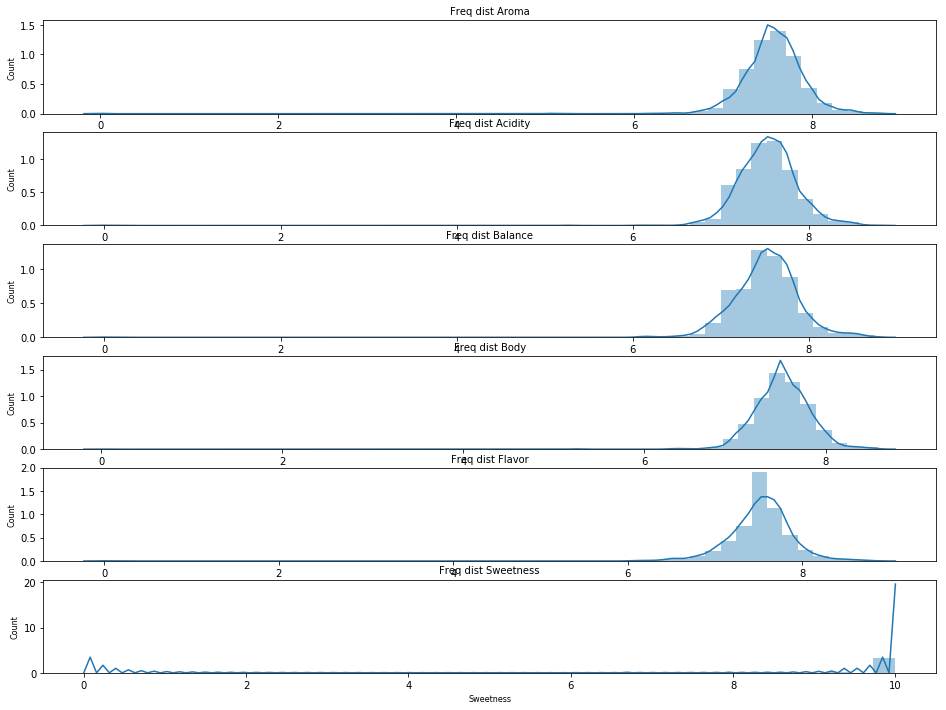

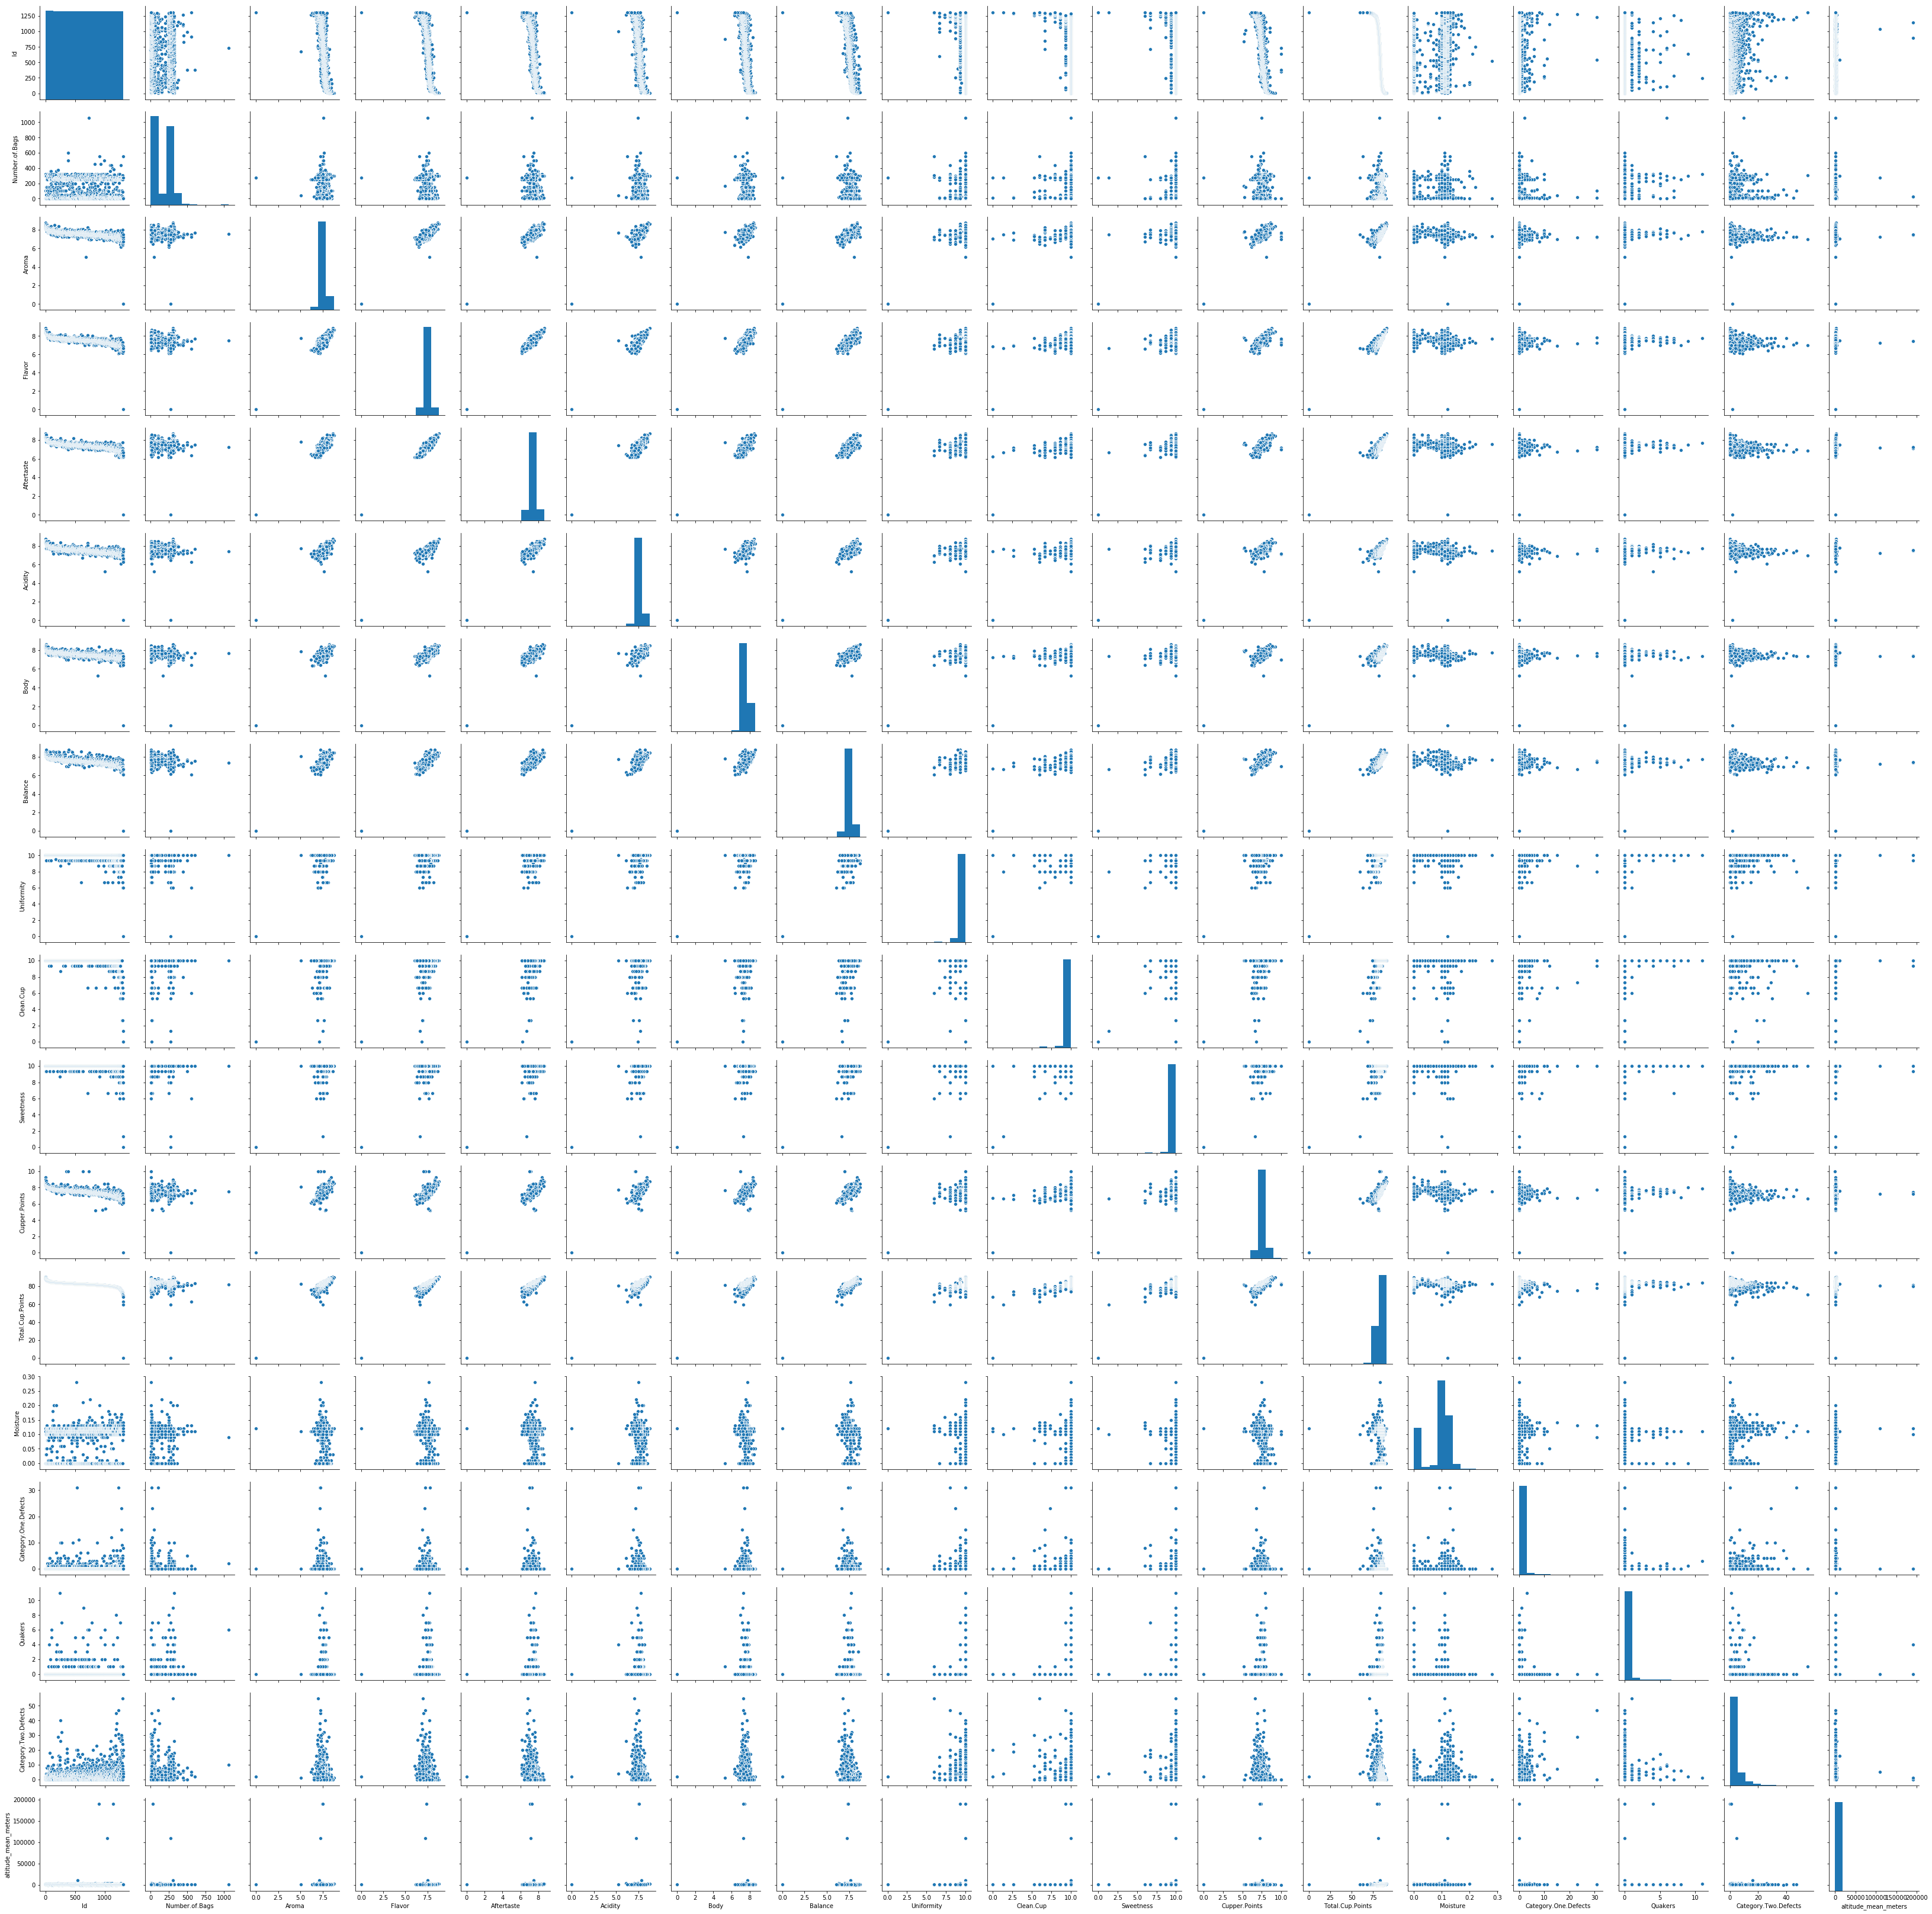

In [72]:
#some initial plots 

col_names = ['Aroma','Acidity','Balance', 'Body', 'Flavor', 'Sweetness']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df_ar[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#Huge pairplot matrix.  Probably need to whittle down the attributes a bit first.Example drops below


sns.pairplot(df_ar)


Well it seems as though we still have too many variables.  Lets divy them up into numerical and
categorical.  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168780A15C0>,
      dtype=object)

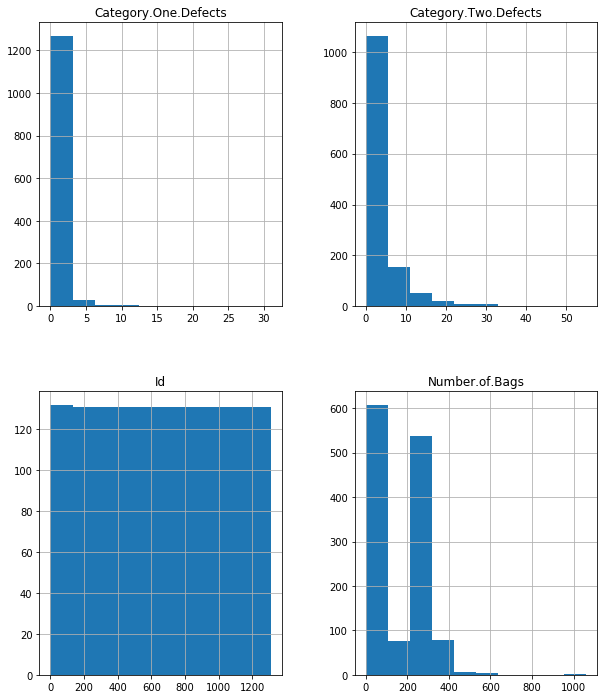

In [69]:
df_num = df_ar.select_dtypes(include=['int64'])
df_num.hist(figsize =(10,12))

# df_cat = df_ar.select_dtypes(include=['object'])
# df_cat.hist(figsize =(10,12))


